<a href="https://colab.research.google.com/github/tobenson21/Data_Enginner/blob/main/tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Realizacion de graficos mediante Matplotlib

In [ ]:
#Se importa librerias pandas, numpy, matplotlib seaborn para trabajar con base de datos formato excel
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from google.colab import drive
import random
%matplotlib inline

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Se realiza la busqueda de ruta del archivo excel y luego se imprime
files = '/content/drive/MyDrive/Estudio_Diplomado/ejemplos pandas/00-ejemplos-20240701T234831Z-001/00-ejemplos/consultas.csv'
df = pd.read_csv(files, sep=';')
df['Costo_consulta'] = df['Costo_consulta'].fillna(0).astype(int)
df['Costo_consulta'] = df['Costo_consulta'].replace(0, df['Costo_consulta'].mean())
df = df.drop('RUT2', axis = 1)
df


,Fecha_Hora_Consulta,RUT,Especialidad,Diag,Costo_consulta
0,2018-11-15,15.439.959-0,Cardiología,Enfermedad 6,21000
1,2018-02-27,6.369.292-4,Medicina General,Enfermedad 0,14000
2,2018-03-02,16.566.679-4,Cardiología,Enfermedad 6,20000
3,2018-09-18,18.124.934-0,Cardiología,Enfermedad 6,31000
4,2018-08-27,18.993.070-0,Cardiología,Enfermedad 6,18000
...,...,...,...,...,...
195,2018-12-03,4.464.429-4,Cardiología,Enfermedad 6,31000
196,2018-11-09,9.097.028-5,Dermatología,Enfermedad 3,34000
197,2018-10-06,21.220.974-4,Medicina General,Enfermedad 0,20000
198,2018-09-13,10.742.393-7,Medicina General,Enfermedad 0,28000


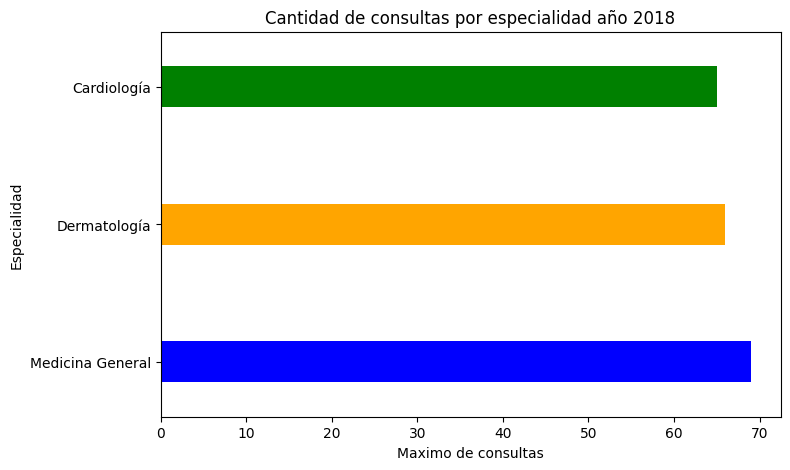

In [ ]:
#Creacion Grafico de Barra
df['Especialidad'].value_counts().plot(kind='barh', figsize=(8, 5),title= 'Cantidad de consultas por especialidad año 2018',width= 0.3 ,color = ['blue', 'orange', 'green'])
plt.xlabel('Maximo de consultas')
plt.ylabel('Especialidad')
plt.show()

## Este grafico de barra muestra la cantidad de atenciones por especialidades. Sirve de utilidad para saber cual es la especialidad que los pacientes se atenden

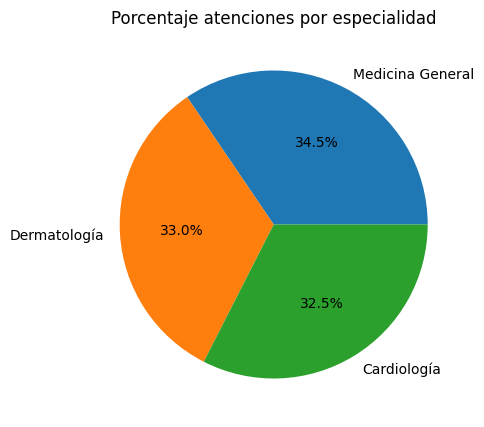

In [ ]:
df['Especialidad'].value_counts().plot(kind='pie', figsize=(8, 5),title= 'Porcentaje atenciones por especialidad año 2018',autopct='%1.1f%%')
plt.ylabel('')
plt.show()

## Este grafico de muestra la cantidad en porcentaje de las atenciones por especialidades en el año 2018

In [ ]:
val_total_especialidad = df.groupby('Especialidad')['Costo_consulta'].sum()

<function matplotlib.pyplot.show(close=None, block=None)>

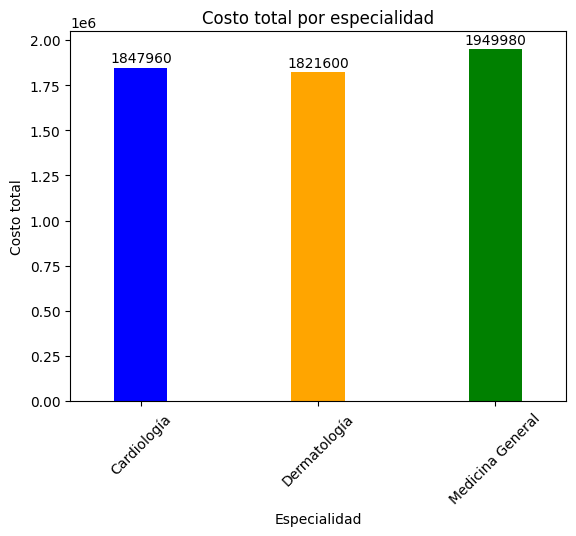

In [ ]:
val_total_especialidad.plot(kind='bar',title= 'Costo total por especialidad',width= 0.3,color = ['blue', 'orange', 'green'])
plt.xlabel('Especialidad')
plt.ylabel('Costo total')
plt.xticks(rotation= 45)
for i, v in enumerate(val_total_especialidad):
  plt.text(i, v*1.015, str(v), ha='center')
plt.show


## Este grafico de barra muestra el total de ventas de atenciones por especialidades en el año 2018. Sirve para saber cuanto es la ingreso por especialidad y sacar conclusiones sobre la especialidad

In [ ]:
df['Fecha_Hora_Consulta'] = pd.to_datetime(df['Fecha_Hora_Consulta'])
tiempo_especialidad = df['Fecha_Hora_Consulta'].dt.to_period('M').groupby(df['Especialidad']).value_counts().sort_index()

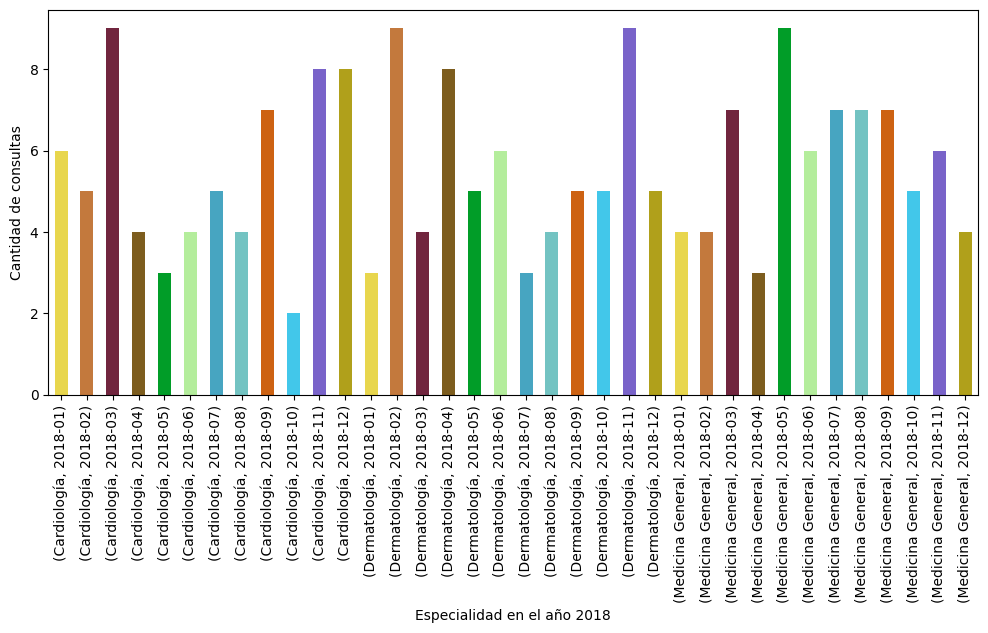

In [ ]:
col =(np.random.random(), np.random.random(), np.random.random())
tiempo_especialidad.plot(kind='bar', figsize=(12, 5), color = np.random.rand(12,3))
plt.xlabel('Especialidad en el año 2018')
plt.ylabel('Cantidad de consultas')
plt.xticks(rotation= 90)
plt.show()

## Este grafico de barra muestra la cantidad de atenciones por meses en cada especialidad en el año 2018. Sirve para comparar los meses por especialidad, cada mes tiene el mismo color como referencia por especialidad


In [ ]:
#df.groupby('Fecha_Hora_Consulta').dt.to_period('M')['Costo_consulta'].sum()
total_venta_mes = df['Costo_consulta'].groupby(df['Fecha_Hora_Consulta'].dt.to_period('M')).sum()

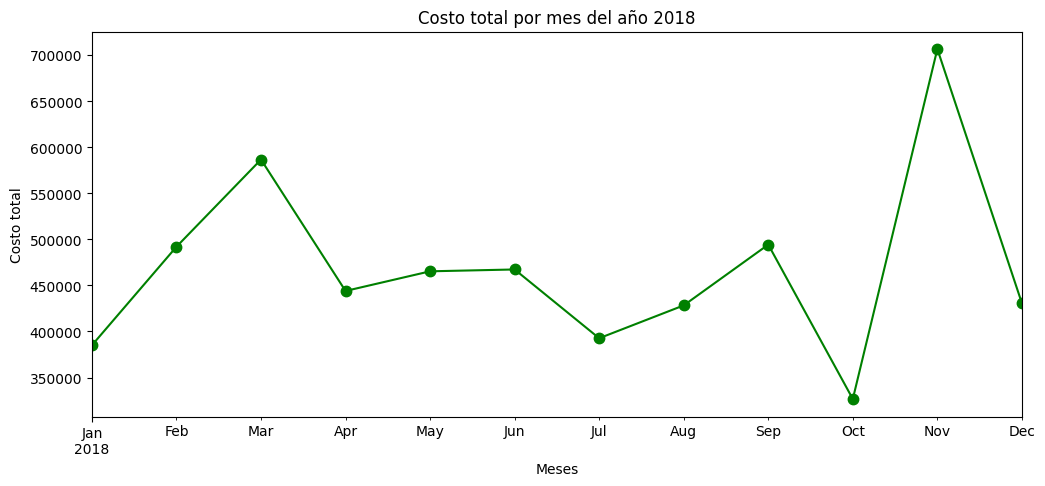

In [ ]:
total_venta_mes.plot(color= 'green',figsize=(12, 5), marker='.', markersize=15)
plt.title('Costo total por mes del año 2018')
plt.xlabel('Meses')
plt.ylabel('Costo total')
plt.show()

## En este grafico lineal se muestra el total de ingreso por mes en el año 2018. Podemos saber en que mes hubo mas ingresos y cual menos